In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [2]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('D:/python/rdkit/new222new.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                                  SMILES  \
0               OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O   
1     O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...   
2     OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...   
3                CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2   
4                          CN1CC2CC(C1)C1=CC=CC(=O)N1C2   
...                                                 ...   
8433                                      O=[N+]([O-])C   
8434                                                 OC   
8435                                            S=C(N)N   
8436                                           O=C(NO)N   
8437                                            O=C(N)N   

      measured log(solubility:mol/L)  
0                               0.79  
1                               0.79  
2                               0.79  
3                               0.65  
4                               0.65  
...                        

In [3]:
y = sol.iloc[:,1]
y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

In [46]:

X = []

for smile, Hlist in XY.items():
    try:
        X.append(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), radius=2,nBits = 2048))

    except:
        pass
X = [list(a) for a in X]
print(len(X))


8438


In [5]:
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression



In [1]:


nonzero_indices = [i for i, coef in enumerate(reg.coef_) if coef != 0]
nonzero_coefs = [reg.coef_[i] for i in nonzero_indices]

# Create a dataframe with the nonzero coefficients
coefs_df = pd.DataFrame({'Bit': nonzero_indices, 'Coefficient': nonzero_coefs})

# Save the dataframe to a csv file
coefs_df.to_csv('lasso_coefs.csv', index=False)


In [10]:
x = X



# Fit a LASSO regression model on the fingerprints and target variable
reg = Lasso(alpha=0.01)
reg.fit(x, y)

nonzero_indices = [i for i, coef in enumerate(reg.coef_) if coef != 0]
for i in nonzero_indices:
    print("Bit", i, ":", reg.coef_[i])

# Select the columns with nonzero coefficients from the x array
x_nonzero = [[row[i] for i in nonzero_indices] for row in x]

Bit 1 : -0.05526644542757353
Bit 2 : -0.021229676961658308
Bit 97 : -0.5406050713781421
Bit 113 : -0.7635518194526666
Bit 114 : -0.7005024875195844
Bit 116 : -0.41389811077449085
Bit 147 : -0.11905674916033511
Bit 222 : 0.47899798494229784
Bit 227 : 0.49874120718089365
Bit 283 : -0.26655672737965386
Bit 294 : -0.2953202317993458
Bit 314 : 0.18495526645986587
Bit 322 : -0.19824676470337801
Bit 352 : -0.8035414465680405
Bit 366 : -0.2095677934835081
Bit 378 : 0.18408203322990838
Bit 389 : 0.0919792557493425
Bit 401 : -0.28712580948756244
Bit 486 : 0.1900365265562244
Bit 561 : -0.698314468816143
Bit 591 : -0.2587329539781839
Bit 650 : 0.2660247736981636
Bit 661 : -0.08839269253266398
Bit 675 : -0.09390879968318701
Bit 694 : -0.12088934521351938
Bit 715 : -0.14413861311662995
Bit 725 : -0.3299758070083639
Bit 728 : -0.2913248582449641
Bit 739 : -0.39426995325638436
Bit 794 : -0.2688962570191682
Bit 807 : 0.7868294704755936
Bit 808 : -0.3032855999905743
Bit 816 : -0.07033199272411447
Bit 87

In [11]:
len(x_nonzero)

8438

In [12]:
X=x_nonzero
len(X)

8438

In [13]:
len(y)

8438

In [ ]:
#FOR prouned fingerprint-204

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=424)
#test size is 20% and traing size is 80%
#linear regression
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
from sklearn.metrics import mean_absolute_error

In [7]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 1.17
Coefficient of determination (R^2): 0.60


In [19]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.8847040526880584
RMSE (filtered test): 1.1707548103050602
R^2 (filtered test): 0.6004799439806268


In [46]:
mae = mean_absolute_error(Y_train, Y_pred_train)
mae

0.8774942313861861

In [18]:
#predicts the X_test
Y_pred_test = model.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 1.14
Coefficient of determination (R^2): 0.63


In [20]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.8703598886091288
RMSE (filtered test): 1.1383582875651472
R^2 (filtered test): 0.6330649426038328


In [48]:
mae = mean_absolute_error(Y_test, Y_pred_test)
mae

0.8717685085279837

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [21]:
Y_pred_train = model.predict(X_train)
#predicts the X_train
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 0.53
Coefficient of determination (R^2): 0.92


In [22]:
mae = mean_absolute_error(Y_train, Y_pred_train)
mae

0.3400665477837547

In [23]:
Y_pred_test = model.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.93
Coefficient of determination (R^2): 0.76


In [24]:
mae = mean_absolute_error(Y_test, Y_pred_test)
mae

0.6490958075801325

In [ ]:
#FOR all fingerprint-2048

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=424)

In [30]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [31]:
#predicts the X_train
Y_pred_train = reg.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 0.74
Coefficient of determination (R^2): 0.84


In [32]:
#predicts the X_test
Y_pred_test = reg.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 1.11
Coefficient of determination (R^2): 0.66


In [11]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.5599029151551838
RMSE (filtered test): 0.74485431019533
R^2 (filtered test): 0.836977585643221


In [12]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.8067095532893158
RMSE (filtered test): 1.1070753977495507
R^2 (filtered test): 0.6634555464241287


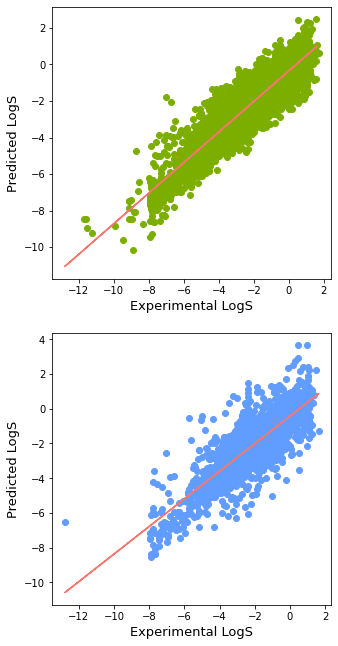

In [12]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS morgan.pdf',dpi=1200)
plt.show()

In [33]:
import numpy as np

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Print the shapes
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6750, 2048) (1688, 2048) (6750,) (1688,)


In [34]:
yhat = reg.predict(X_test)

In [35]:
from sklearn.neighbors import LocalOutlierFactor


lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_test)



In [36]:
mask = yhat != -1
X_test, Y_test = X_test[mask, :], Y_test[mask]
print(X_test.shape, Y_test.shape)
# fit the model


(1607, 2048) (1607,)


In [37]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
# evaluate the model
Y_test_pred2 = reg.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.794


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 1.0904183811361776
R^2 (filtered): 0.6791750446061895


In [39]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)


In [40]:
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]

In [41]:
print(X_train.shape, Y_train.shape)

(6232, 2048) (6232,)


In [42]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
# evaluate the model
Y_train_pred2 = reg.predict(X_train)
# evaluate predictions
mae = mean_absolute_error(Y_train, Y_train_pred2)
print('MAE: %.3f' % mae)

MAE: 0.532


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_train, Y_train_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_train, Y_train_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.7079554429843881
R^2 (filtered): 0.856517064961362


In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 1.0904183811361776
R^2 (filtered): 0.6791750446061895


In [21]:
sorted_indices = np.argsort(Y_train)

indices_list = sorted_indices.tolist()

#print("Indices List:", indices_list)
print("Shape of indices_list:", len(indices_list))


Shape of indices_list: 6232


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_train, Y_train_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_train, Y_train_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.7079554429843881
R^2 (filtered): 0.856517064961362


In [1]:
outlier_features = sol.iloc[outlier_indices]
outlier_features

In [2]:
outlier_features.to_csv('sorted_residuals.csv', index=False)

In [2]:
outlier_indices = np.where(mask == False)[0]

print(outlier_indices)

In [3]:

sorted_indices = np.argsort(Y_train)

indices_list = sorted_indices.tolist()
# select all rows that are not outliers
mask = yhat != -1
X_train_filtered = X_train[mask, :]
removed_indices = [i for i, val in enumerate(mask) if not val]

removed_features = []
for index in removed_indices:
    removed_features.append(X_train[index])

print("Removed Features:")
for feature in removed_features:
    print(len(indices_list))


In [5]:

reg = LinearRegression()
reg.fit(X, y)

# Print out the coefficients for each fingerprint
for i in range(len(X[0])):
    print("Bit", i, ":", reg.coef_[i])


In [55]:
import csv
with open('coefficients.csv', mode='w') as file:
    writer = csv.writer(file)
    for i in range(len(X[0])):
        writer.writerow(['Bit ' + str(i), reg.coef_[i]])

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=991)

In [48]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [49]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))


Mean squared error (RMSE): 0.35
Coefficient of determination (R^2): 0.96


In [50]:
Y_pred_test = model.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.81
Coefficient of determination (R^2): 0.82


In [51]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.23062587850304098
RMSE (filtered test): 0.3515400664693368
R^2 (filtered test): 0.9639789519056186


In [52]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.5539780328231513
RMSE (filtered test): 0.8079886888935913
R^2 (filtered test): 0.8151404797761294


In [53]:
import numpy as np

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Print the shapes
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(6750, 2048) (1688, 2048) (6750,) (1688,)


In [54]:
yhat = model.predict(X_test)
# evaluate predictions
#mae = mean_absolute_error(Y_test, yhat)
#print('MAE: %.3f' % mae)

In [55]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_test)

In [56]:
mask = yhat != -1
X_test, Y_test = X_test[mask, :], Y_test[mask]


In [57]:
print(X_test.shape, Y_test.shape)

(1599, 2048) (1599,)


In [58]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)
# evaluate the model
Y_test_pred2 = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.550


In [59]:
Y_test_pred2 = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.550


In [16]:
# fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_test, Y_test)
# evaluate the model
Y_test_pred2 = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.305


In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.8004440970303283
R^2 (filtered): 0.8211099833956738


In [61]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [62]:
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]


In [63]:
print(X_train.shape, Y_train.shape)

(6222, 2048) (6222,)


In [64]:
# fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
# evaluate the model
Y_train_pred2 = model.predict(X_train)
# evaluate predictions
mae = mean_absolute_error(Y_train, Y_train_pred2)
print('MAE: %.3f' % mae)

MAE: 0.229


In [65]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_train, Y_train_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_train, Y_train_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.34738917231850436
R^2 (filtered): 0.9658128288976149


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.4222656287124903
R^2 (filtered): 0.9495103076631607


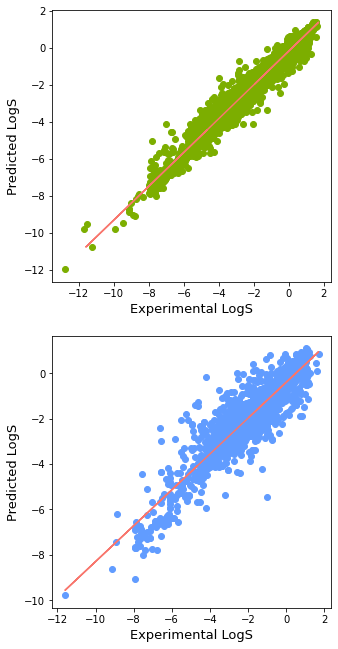

In [67]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_train_pred2, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_test_pred2, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_test_pred2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS morgan.pdf',dpi=1200)
plt.show()

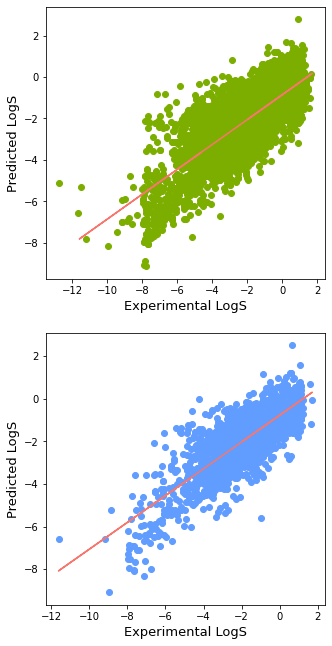

In [21]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS morgan.pdf',dpi=1200)
plt.show()

In [74]:
import shap
from sklearn.preprocessing import StandardScaler
import os
import sys
#import Explanation

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [75]:
X = X_test
Xscaler = StandardScaler()
X2= Xscaler.fit_transform(X)
explainer = shap.TreeExplainer(model,data=X2,feature_perturbation='interventional')
shap_values = explainer.shap_values(X2)


100%|===================| 1594/1599 [01:45<00:00]        

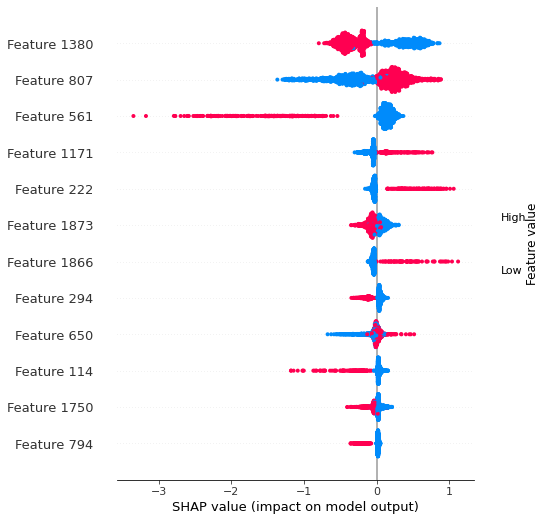

In [76]:
#shap.summary_plot(shap_values, X2,max_display=12)
#shap.summary_plot(shap_values, max_display=12,color='r')
shap.summary_plot(shap_values, X2, plot_type="dot", plot_size=0.6, show=False,max_display=12)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

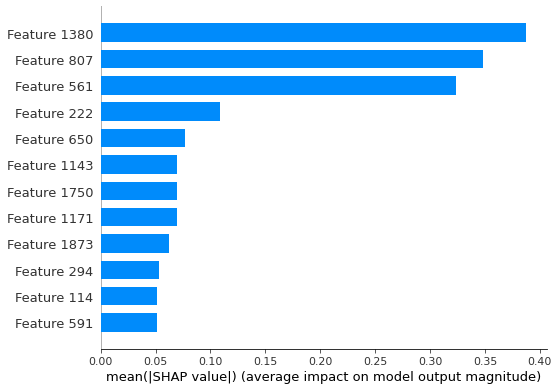

In [321]:
shap.summary_plot(shap_values, max_display=12, plot_type="bar",show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

In [322]:
#vals= np.abs(shap_values).mean(0)
#feature_importance = pd.DataFrame(list(zip(X2,vals)),columns=['col_name','feature_importance_vals'])
#feature_importance["feature_importance_vals"] = np.abs(feature_importance["feature_importance_vals"])
#feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
#feature_importance.head()

import numpy as np
vals= np.abs(shap_values).mean(0)
i=12
feature_importance = pd.DataFrame(list(zip(X2[i], vals)), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance[:12]


,col_name,feature_importance_vals
1380,0.798277,0.387226
807,-1.160907,0.347999
561,-0.383065,0.323412
222,-0.322474,0.108805
650,0.836600,0.076407
1143,-0.188634,0.069769
1750,1.263694,0.069694
1171,-0.471490,0.069169
1873,0.945780,0.062422
294,-0.545402,0.052834


In [75]:
#feature_importance.to_excel(r'D:/python/rdkit/File Name44.xlsx', index = False)

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

# Read the dataset with SMILES strings
data = pd.read_csv('D:/python/rdkit/outlier_MF.csv')
smiles_list = data.iloc[:, 0]

# Dictionary to store results
results = {}

# Iterate over each SMILES string
for i, smiles in enumerate(smiles_list):
    molecule = Chem.MolFromSmiles(smiles)
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(molecule, radius=2, bitInfo=bi, nBits=2048)
    on_bits = list(fp.GetOnBits())
    results[f"Result_{i+1}"] = on_bits

# Print the results
for name, bits in results.items():
    print(f"{name}: {bits}")


In [9]:
from collections import Counter

# Flatten the lists into a single list
flattened_list = [num for sublist in lists for num in sublist]

# Count the occurrences of each number
counts = Counter(flattened_list)

# Print the count for each number
for num, count in counts.items():
    print(f"{num}: {count}, ")

In [79]:
import pandas as pd

# Flatten the lists into a single list
flattened_list = [num for sublist in lists for num in sublist]

# Count the occurrences of each number
counts = Counter(flattened_list)

# Create a DataFrame from the counts
df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Save the DataFrame as an Excel file
df.to_excel('number_counts.xlsx', index_label='Number')


In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

# Read the dataset with SMILES strings
data = pd.read_csv('D:/python/rdkit/dataset_without_outliers.csv')
smiles_list = data.iloc[:, 0]

# Dictionary to store results
results = {}

# Iterate over each SMILES string
for i, smiles in enumerate(smiles_list):
    molecule = Chem.MolFromSmiles(smiles)
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(molecule, radius=2, bitInfo=bi, nBits=2048)
    on_bits = list(fp.GetOnBits())
    results[f"Result_{i+1}"] = on_bits

# Print the results
for name, bits in results.items():
    print(f"'{name}': {bits},")

In [93]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

# Read the dataset with SMILES strings
data = pd.read_csv('D:/python/rdkit/dataset_without_outliers.csv')
smiles_list = data.iloc[:, 0]

# Dictionary to store results
resultsss = {}

# Iterate over each SMILES string
for i, smiles in enumerate(smiles_list):
    molecule = Chem.MolFromSmiles(smiles)
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(molecule, radius=2, bitInfo=bi, nBits=2048)
    on_bits = list(fp.GetOnBits())
    resultsss[f"Result_{i+1}"] = on_bits




In [11]:
from collections import Counter
lists = list(results.values())
# Flatten the lists into a single list
flattened_list = [num for sublist in lists for num in sublist]

# Count the occurrences of each number
counts = Counter(flattened_list)

# Print the count for each number
for num, count in counts.items():
    print(f"{num}: {count} times")

In [106]:
result_counts_df = pd.DataFrame({key: [counts.get(num, 0) for num in value] for key, value in results.items()})

# Save the DataFrame as an Excel file
result_counts_df.to_excel('result_counts.xlsx', index=False)

In [14]:
for key, value in results.items():
    result_counts_100 = {num: counts.get(num, 0) for num in value if counts.get(num, 0) < 100}
    print(f"Counts below 100 for {key}:")
    dict_length2 = len(result_counts_100)
    print("Length of the dictionary:", dict_length2)
    print(result_counts_100)
    print()


In [15]:
for key, value in results.items():
    result_counts = {num: counts.get(num, 0) for num in value}
    result_counts_100 = {num: counts.get(num, 0) for num in value if counts.get(num, 0) < 100}
    dict_length2 = len(result_counts_100)
    dict_length = len(result_counts)
    print(f"Counts for {key}:")
    print("Length of the dictionary:", dict_length)
    print("Length of the dictionary100:", dict_length2)
    ratio = dict_length2 / dict_length
    print("Ratio:", ratio)
    print(result_counts)
    print()

In [17]:
import pandas as pd

# Create an empty DataFrame
df = pd.DataFrame()

# Iterate over the results
for key, value in results.items():
    result_counts = {num: counts.get(num, 0) for num in value}
    result_counts_100 = {num: counts.get(num, 0) for num in value if counts.get(num, 0) < 100}
    dict_length = len(result_counts)
    dict_length_100 = len(result_counts_100)
    ratio = dict_length_100 / dict_length

    # Create a DataFrame for the current result
    result_df = pd.DataFrame({'Length of the dictionary': [dict_length],
                              'Length of the dictionary100': [dict_length_100],
                              'Ratio': [ratio]})

    # Append the result DataFrame to the main DataFrame
    df[key] = result_df.values.flatten()

# Transpose the DataFrame
df = df.T

# Set column names
df.columns = ['Length of the dictionary', 'Length of the dictionary100', 'Ratio']

# Save the DataFrame to an Excel file
df.to_excel('results.xlsx', index_label='Counts for Result')


In [18]:
#import pandas as pd
total_ratio = 0
count = 0
# Create an empty DataFrame
df = pd.DataFrame()

# Iterate over the results
for key, value in resultsss.items():
    result_countsss = {num: counts.get(num, 0) for num in value}
    result_countsss_100 = {num: counts.get(num, 0) for num in value if counts.get(num, 0) < 100}
    dict_length2 = len(result_countsss_100)
    dict_length = len(result_countsss)
    ratio = dict_length2 / dict_length

    # Create a DataFrame for the current result
    result_df = pd.DataFrame({'Length of the dictionary': [dict_length],
                              'Length of the dictionary100': [dict_length2],
                              'Ratio': [ratio]})
    total_ratio += ratio
    count += 1

    # Append the result DataFrame to the main DataFrame
    df[key] = result_df.values.flatten()

# Transpose the DataFrame
df = df.T

# Set column names
df.columns = ['Length of the dictionary', 'Length of the dictionary100', 'Ratio']

# Save the DataFrame to an Excel file
df.to_excel('results.xlsx', index_label='Counts for Result')

In [59]:
z=sol.iloc[:,0]
z

0                 OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O
1       O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...
2       OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...
3                  CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2
4                            CN1CC2CC(C1)C1=CC=CC(=O)N1C2
                              ...                        
8433                                        O=[N+]([O-])C
8434                                                   OC
8435                                              S=C(N)N
8436                                             O=C(NO)N
8437                                              O=C(N)N
Name: SMILES, Length: 8438, dtype: object

In [60]:
mol=z[1996]
mol

'[#6]CC1=C(C[#6])[NH0]=C2[NH0]=C(O)[NH0]=CC2=[NH0]1'

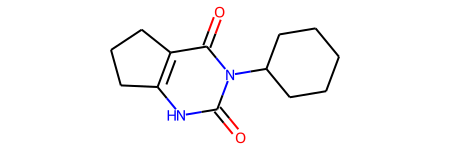

In [23]:
mol = Chem.MolFromSmiles(z[1995])
mol

In [61]:
from rdkit.Chem import rdMolDescriptors

In [62]:
w = Chem.MolFromSmiles(z[8402])
w

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)
# show 10 of the set bits:
list(fp.GetOnBits())[:]



[44, 389, 446, 650, 807, 1917]

In [70]:
#Blind test
sol2 = pd.read_csv('D:/python/rdkit/testexperiment2upload3raw.csv')
print(sol2.head)
XY2 = sol2.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                              Substance  \
0                         hexobarbital   
1                       nalidixic_acid   
2                        phenantroline   
3                        phenobarbital   
4                       sulfamethazine   
5                         bromogramine   
6                      phenazopyridine   
7                           amantadine   
8                      benzylimidazole   
9                       chlorpropamide   
10                          cimetidine   
11                              thymol   
12                          tryptamine   
13                        azathioprine   
14                       sulfathiazole   
15                       acetaminophen   
16                           diazoxide   
17                          famotidine   
18                  hydroflumethiazide   
19                      nitrofurantoin   
20                phthalic_acid_form_I   
21                       sulfacetamide   
22  

In [71]:
#y = []
X3 = []
#bi = {}
for smile, Hlist in XY2.items():
    try:
        X3.append(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), radius=2,nBits = 2048))
  #      y.append(Hlist[0])
    except:
        pass
X3 = [list(c) for c in X3]
print(len(X3))


32


In [72]:
Xnew=X3
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

array([-2.222385  , -2.53149843, -1.91190833, -2.33090571, -2.42708156,
       -3.51647083, -4.05725   , -1.73766623, -1.8102    , -2.92794263,
       -1.49817663, -2.1925    , -2.895345  , -2.8499    , -2.64537033,
       -1.18441143, -3.22751858, -2.14637818, -1.17737679, -3.40739423,
       -0.93308519, -1.50381587, -2.78599881, -2.83131   , -2.3167051 ,
       -2.85619794, -1.86028833, -2.122     , -1.34980968, -4.09521   ,
       -2.35935621, -2.35047333])

In [73]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(ynew)
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [77]:
#Solubility Challenge
sol3 = pd.read_csv('D:/python/rdkit/testexperiment2upload2raw.csv')
print(sol3.head)
XY3 = sol3.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                      name                                             SMILES
0              Acebutolol        CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1
1             Amoxicillin  O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...
2     Bendroflumethiazide  O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...
3              Benzocaine                             NC1=CC=C(C(OCC)=O)C=C1
4            Benzthiazide  O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...
5   2-chloromandelic_acid                            OC(C(O)C1=CC=CC=C1Cl)=O
6               Clozapine    ClC(C=C1)=CC2=C1NC(C=CC=C3)=C3C(N4CCN(C)CC4)=N2
7               Dibucaine        CCN(CC)CCNC(C1=C(C=CC=C2)C2=NC(OCCCC)=C1)=O
8      Diethylstilbestrol          CC/C(C1=CC=C(O)C=C1)=C(C2=CC=C(O)C=C2)/CC
9              Diflunisal              FC(C=C1F)=CC=C1C2=CC=C(O)C(C(O)=O)=C2
10           Dipyridamole  OCCN(CCO)C1=NC2=C(N3CCCCC3)N=C(N(CCO)CCO)N=C2C...
11              Ephedrine                     

In [78]:
#y = []
X4 = []
#bi = {}
for smile, Hlist in XY3.items():
    try:
        X4.append(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), radius=2,nBits = 2048))
  #      y.append(Hlist[0])
    except:
        pass
X4 = [list(c) for c in X4]
print(len(X4))

32


In [79]:
X2new=X4
y2new = model.predict(X2new)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
y2new

array([-2.69522917, -1.91463233, -2.79622583, -2.4917635 , -2.79038585,
       -1.04425   , -3.51816   , -2.31161167, -2.06833   , -2.029744  ,
       -0.20999865, -1.00608238, -1.99396097, -2.22801267, -2.74129167,
       -1.717155  , -2.5856195 , -3.330695  , -1.55696   , -1.92687958,
       -1.82237497, -3.42102976, -1.00608238, -2.65223833, -3.89918333,
       -1.47105   , -2.8726148 , -2.91112611, -1.43407   , -3.08794741,
       -3.22764167, -2.95346029])

In [80]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(y2new)
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [ ]:
i=1656
u=1477

while i<8000:
    w = Chem.MolFromSmiles(z[i])

    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)
# show 10 of the set bits:
    j=list(fp.GetOnBits())[:]

    if u in j:
    #if a==0.97 and b==0.81:
        break
    #u=r2_score(Y_test, Y_pred_test)
    #b=round(u,2)
    
    
    i+=1
i

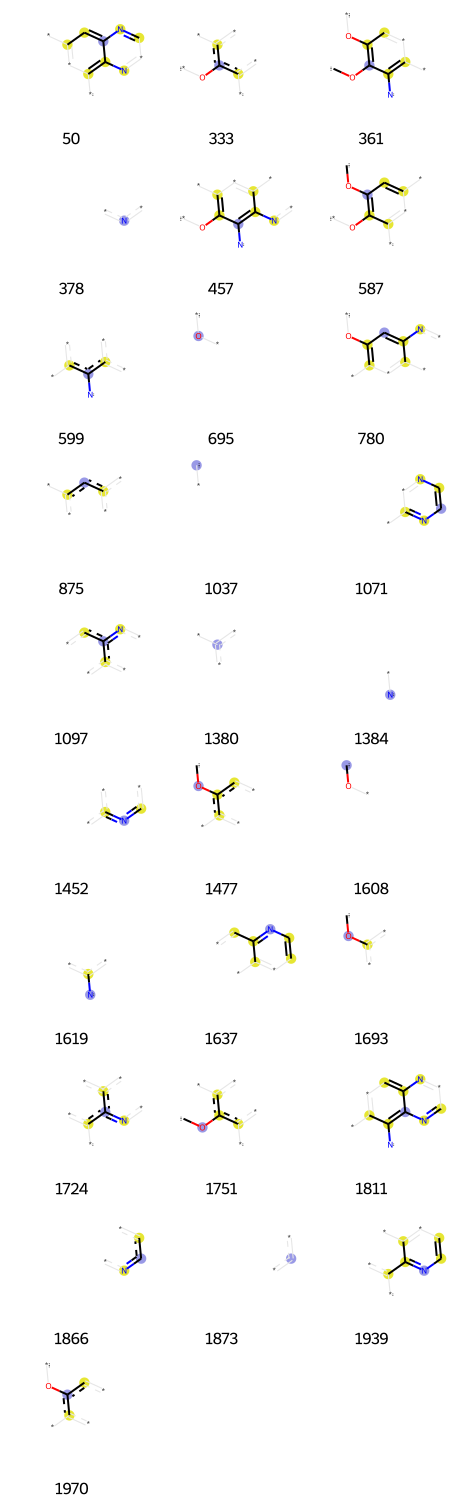

In [74]:
w = Chem.MolFromSmiles(z[1814])
w

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)

tpls = [(w,x,bi) for x in fp.GetOnBits()]
p=Draw.DrawMorganBits(tpls[:],molsPerRow=3,legends=[str(x) for x in fp.GetOnBits()][:])
dpi=1200
p

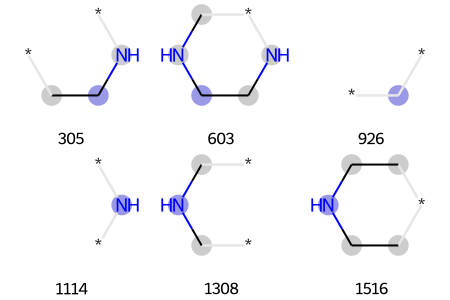

In [82]:
mol1 = Chem.MolFromSmiles('N1CCNCC1')
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol1, radius=2, bitInfo=bi, nBits = 2048)

tpls = [(mol1,x,bi) for x in fp.GetOnBits()]
p=Draw.DrawMorganBits(tpls[:],molsPerRow=3,legends=[str(x) for x in fp.GetOnBits()][:])
dpi=1200
p

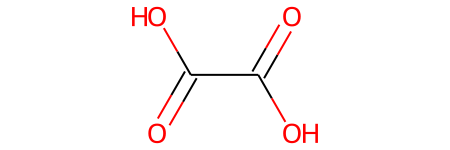

In [423]:
mol=z[2506]
mol
w = Chem.MolFromSmiles(z[8402])
w

In [400]:
def getSubstructSmi(mol,atomID,radius):
    if radius>0:
        env = Chem.FindAtomEnvironmentOfRadiusN(mol,radius,atomID)
        atomsToUse=[]
        for b in env:
            atomsToUse.append(mol.GetBondWithIdx(b).GetBeginAtomIdx())
            atomsToUse.append(mol.GetBondWithIdx(b).GetEndAtomIdx())
        atomsToUse = list(set(atomsToUse))
    else:
        atomsToUse = [atomID]
        env=None
    symbols = []

    smi = Chem.MolFragmentToSmiles(mol,atomsToUse,bondsToUse=env,allHsExplicit=True, allBondsExplicit=True, rootedAtAtom=atomID)
    smi2 = Chem.MolFragmentToSmiles(mol,atomsToUse,bondsToUse=env,atomSymbols=symbols, allBondsExplicit=True, rootedAtAtom=atomID)
    return smi,smi2

In [401]:
bi_bz = {}
fp_bz = AllChem.GetMorganFingerprintAsBitVect(w,radius=2,nBits=2048,bitInfo=bi_bz)
fp_bz

In [402]:
info_bz = []
for bitId,atoms in bi_bz.items():
    exampleAtom,exampleRadius = atoms[0]
    description = getSubstructSmi(w,exampleAtom,exampleRadius)
    info_bz.append((bitId,exampleRadius,description[0],description[1]))
#print(info_bz)

In [403]:
collection = {}
for bid,rad,smi,sma in info_bz:
    collection[bid] = [bid,rad,smi,sma,'','']

In [404]:
import pandas as pd
pd.options.display.width=100000 # options to make sure our wide columns display properly
pd.options.display.max_colwidth=1000

In [405]:
df = pd.DataFrame(list(collection.values()),columns=('Bit','radius','smi_bz','sma_bz','smi_pyr','sma_pyr'))
print(df.to_string())

     Bit  radius                                      smi_bz                 sma_bz smi_pyr sma_pyr
0     80       0                                       [CH2]                      C                
1    106       2  [c](:[cH]:[cH])(:[cH]:[cH])-[C](=[O])-[OH]  c(:c:c)(:c:c)-C(=O)-O                
2    202       2              [cH](:[cH]:[c]):[c](:[cH])-[N]        c(:c:c):c(:c)-N                
3    294       1                                 [CH3]-[CH2]                    C-C                
4    348       2               [CH2](-[CH2]-[CH3])-[CH2]-[N]            C(-C-C)-C-N                
5    389       1                                    [OH]-[C]                    O-C                
6    408       2           [N](-[CH3])(-[CH2]-[CH2])-[N]=[N]        N(-C)(-C-C)-N=N                
7    456       1                        [C](-[c])(=[O])-[OH]            C(-c)(=O)-O                
8    591       2                   [CH2](-[CH3])-[CH2]-[CH2]              C(-C)-C-C                
